<a href="https://colab.research.google.com/github/ananta1234/feature_importance/blob/main/Determining_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate and Clean Sample Data

In [ ]:
# Generate sample data

import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Sample size
n_samples = 1000

# Assumptions for more realistic data generation
income_mean = 60000
income_std = 50000
max_age = 70
min_age = 18

# Generate synthetic data
data = {
    "Credit_Score": np.random.normal(650, 100, n_samples).clip(300, 850),
    "Income": np.abs(np.random.normal(income_mean, income_std, n_samples)),
    "Loan_Amount": np.random.exponential(scale=20000, size=n_samples).clip(5000, 50000),
    "Term": np.random.choice([15, 30], n_samples),
    "Age": np.random.randint(min_age, max_age, n_samples),
    "Employment_Length": np.random.randint(0, 40, n_samples),
    "Num_of_Late_Payments": np.random.poisson(2, n_samples).clip(0, 15),
    "Num_Loans": np.random.randint(0, 5, n_samples),
    "Debt_to_Income": np.random.beta(2, 5, n_samples),
    "Home_Ownership": np.random.choice(["OWN", "RENT", "MORTGAGE"], n_samples),
    "Marital_Status": np.random.choice(["MARRIED", "SINGLE", "DIVORCED"], n_samples),
    "Education_Level": np.random.choice(["HIGH_SCHOOL", "BACHELOR", "MASTER", "DOCTORATE"], n_samples),
    "Sex": np.random.choice(["MALE", "FEMALE"], n_samples),
    "Defaulted": np.random.binomial(1, 0.2, n_samples)  # Assuming 20% default rate
}

# Create DataFrame
sample_data = pd.DataFrame(data)
sample_data

,Credit_Score,Income,Loan_Amount,Term,Age,Employment_Length,Num_of_Late_Payments,Num_Loans,Debt_to_Income,Home_Ownership,Marital_Status,Education_Level,Sex,Defaulted
0,699.671415,129967.771829,10454.809461,15,33,16,1,0,0.397080,RENT,MARRIED,DOCTORATE,MALE,1
1,636.173570,106231.684146,5000.000000,15,33,34,4,1,0.220785,MORTGAGE,DIVORCED,BACHELOR,FEMALE,0
2,714.768854,62981.518496,8579.399946,30,63,4,0,2,0.077050,RENT,MARRIED,MASTER,FEMALE,0
3,802.302986,27653.161115,5000.000000,30,56,31,1,1,0.551202,OWN,DIVORCED,BACHELOR,MALE,1
4,626.584663,94911.165681,33029.714202,30,48,2,4,1,0.304633,OWN,MARRIED,BACHELOR,MALE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,621.889971,113507.511916,8390.625889,30,59,18,0,4,0.080524,RENT,SINGLE,HIGH_SCHOOL,FEMALE,0
996,829.768653,58673.937038,39999.143641,30,50,4,1,2,0.171241,OWN,MARRIED,HIGH_SCHOOL,FEMALE,0
997,714.084286,15906.267439,5000.000000,30,67,31,4,0,0.393637,RENT,DIVORCED,MASTER,FEMALE,1
998,592.882101,51846.651803,5000.000000,15,53,9,0,0,0.141143,MORTGAGE,MARRIED,MASTER,FEMALE,0


In [ ]:
# prompt: leveraging one hot encoding, create a new df based on sample_data where all the categorical columns are replaced with new numerical columns. Ensure that this new dataframe is ready to train a model on

from sklearn.preprocessing import OneHotEncoder
# Create one-hot encoded variables
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
one_hot_encoded_variables = one_hot_encoder.fit_transform(sample_data[['Home_Ownership', 'Marital_Status', 'Education_Level']])

# Create new dataframe with one-hot encoded columns for the categorical columns
new_df = pd.DataFrame(one_hot_encoded_variables.toarray(), columns=one_hot_encoder.get_feature_names_out())

# Add all the numerical columns to the new DataFrame
new_df['Credit_Score'] = sample_data['Credit_Score']
new_df['Income'] = sample_data['Income']
new_df['Loan_Amount'] = sample_data['Loan_Amount']
new_df['Term'] = sample_data['Term']
new_df['Age'] = sample_data['Age']
new_df['Employment_Length'] = sample_data['Employment_Length']
new_df['Num_of_Late_Payments'] = sample_data['Num_of_Late_Payments']
new_df['Num_Loans'] = sample_data['Num_Loans']
new_df['Debt_to_Income'] = sample_data['Debt_to_Income']
new_df['Sex'] = sample_data['Sex']

#Add the column of values we are going to predict
new_df['Sex'] = new_df['Sex'].map({'MALE': 0, 'FEMALE': 1})
new_df['Defaulted'] = sample_data['Defaulted']

new_df

,Home_Ownership_MORTGAGE,Home_Ownership_OWN,Home_Ownership_RENT,Marital_Status_DIVORCED,Marital_Status_MARRIED,Marital_Status_SINGLE,Education_Level_BACHELOR,Education_Level_DOCTORATE,Education_Level_HIGH_SCHOOL,Education_Level_MASTER,...,Income,Loan_Amount,Term,Age,Employment_Length,Num_of_Late_Payments,Num_Loans,Debt_to_Income,Sex,Defaulted
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,129967.771829,10454.809461,15,33,16,1,0,0.397080,0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,106231.684146,5000.000000,15,33,34,4,1,0.220785,1,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,62981.518496,8579.399946,30,63,4,0,2,0.077050,1,0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,27653.161115,5000.000000,30,56,31,1,1,0.551202,0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,94911.165681,33029.714202,30,48,2,4,1,0.304633,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,113507.511916,8390.625889,30,59,18,0,4,0.080524,1,0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,58673.937038,39999.143641,30,50,4,1,2,0.171241,1,0
997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,15906.267439,5000.000000,30,67,31,4,0,0.393637,1,1
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,51846.651803,5000.000000,15,53,9,0,0,0.141143,1,0


In [ ]:
cols = new_df.columns
cols

Index(['Home_Ownership_MORTGAGE', 'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Marital_Status_DIVORCED', 'Marital_Status_MARRIED',
       'Marital_Status_SINGLE', 'Education_Level_BACHELOR',
       'Education_Level_DOCTORATE', 'Education_Level_HIGH_SCHOOL',
       'Education_Level_MASTER', 'Credit_Score', 'Income', 'Loan_Amount',
       'Term', 'Age', 'Employment_Length', 'Num_of_Late_Payments', 'Num_Loans',
       'Debt_to_Income', 'Sex', 'Defaulted'],
      dtype='object')

# Build the Model

The models to consider for whether or not a file is high risk that can help us best understand which features are more important are the following:


*   Logistic Regression
*   Decision Tree
*   Random Forrest

More complex models that may be worth looking into if the above don't predict the data well are:


*   Gradient Boosting Machines (GBM)
*   Support Vector Machines (SVM)
*   Neural Networks

The below code example is for Random Forrest, but the code should mostly work for all the models above as well as other ones the team wants to try. Here is the code for building the other models

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

from sklearn.svm import SVC
model = SVC(kernel='linear')  # For linear kernel
model = SVC(kernel='rbf')  # For RBF kernel

from sklearn.neural_network import MLPClassifier
model = MLPClassifier()

In [ ]:
!pip install shap

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap

# Assume X is your feature matrix and y is the labels vector
X_train, X_test, y_train, y_test = train_test_split(new_df.drop("Defaulted", axis=1), new_df["Defaulted"], test_size=0.25)

# Example with Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Evaluate Model Performance & Determine Best Features

In [ ]:
scores

array([0.82      , 0.82      , 0.81333333, 0.81333333, 0.81333333])

In [ ]:
# This is an estimate of the accuracy of the model
scores.sum()/len(scores)

0.8160000000000001

Below are two ways to measure the predictive power of different features. Based on this analysis, we can determine that the best features for prediction are Income, Debt_to_Income, Credit_Score, and Age. We can see a lot of the top features are close in terms of their importance so different methods are giving us slightly different top features.

In [ ]:
# prompt: create a dataframe with all the features as one column and the importance of each feature (held in the importances variable list) in another, then sort the df by importance in descending order
# Feature Importance
importances = model.feature_importances_
feature_names = cols[cols != 'Defaulted']
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False)


,feature,importance
11,Income,0.130154
18,Debt_to_Income,0.126619
10,Credit_Score,0.126458
14,Age,0.106660
15,Employment_Length,0.104920
12,Loan_Amount,0.098205
16,Num_of_Late_Payments,0.059682
17,Num_Loans,0.051271
13,Term,0.021450
1,Home_Ownership_OWN,0.020179


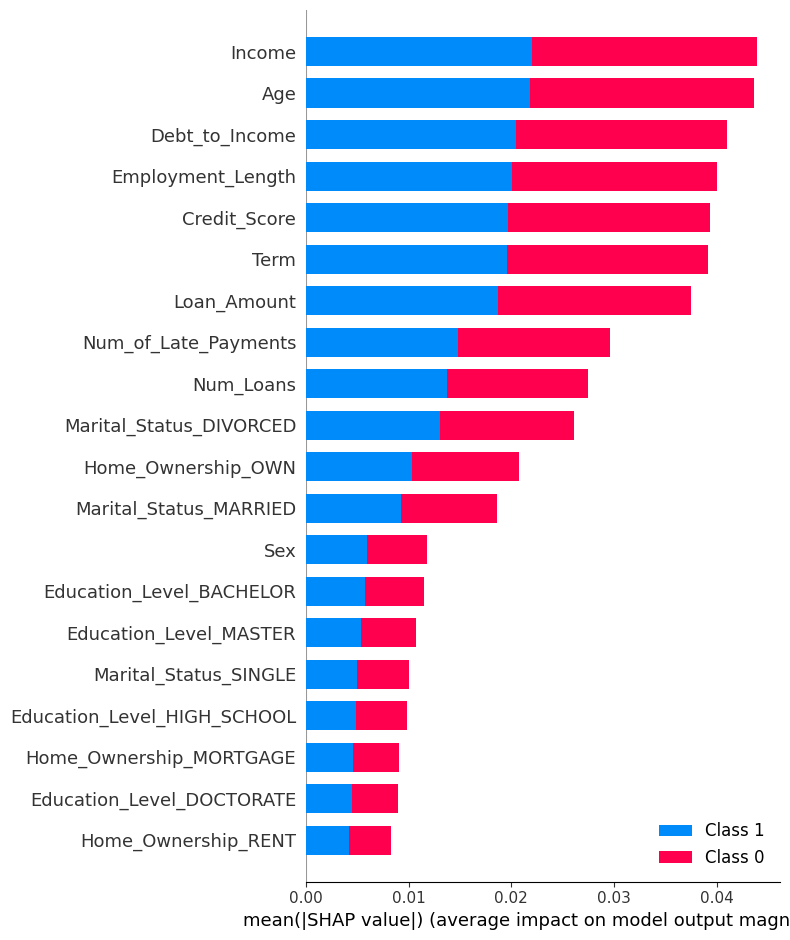

In [ ]:
# For SHAP values (especially for complex models like GBM or Neural Networks)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Output importance
shap.summary_plot(shap_values, X_train, feature_names=feature_names)